# Time Zone Handling

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import pytz
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [2]:
tz = pytz.timezone('US/Eastern')
tz

<DstTzInfo 'US/Eastern' LMT-1 day, 19:04:00 STD>

## Localization and Conversion

In [3]:
rng = pd.date_range('3/9/2012 9:30', periods=6, freq='D')
ts = Series(np.random.randn(len(rng)), index=rng)

In [4]:
print(ts.index.tz)

None


In [5]:
pd.date_range('3/9/2012 9:30', periods=10, freq='D', tz='UTC')

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [6]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-09 09:30:00+00:00    0.396522
2012-03-10 09:30:00+00:00    0.658530
2012-03-11 09:30:00+00:00    0.155084
2012-03-12 09:30:00+00:00   -0.045595
2012-03-13 09:30:00+00:00   -0.465521
2012-03-14 09:30:00+00:00    1.047965
Freq: D, dtype: float64

In [7]:
ts_utc.index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [8]:
ts_utc.tz_convert('US/Eastern')

2012-03-09 04:30:00-05:00    0.396522
2012-03-10 04:30:00-05:00    0.658530
2012-03-11 05:30:00-04:00    0.155084
2012-03-12 05:30:00-04:00   -0.045595
2012-03-13 05:30:00-04:00   -0.465521
2012-03-14 05:30:00-04:00    1.047965
Freq: D, dtype: float64

In [9]:
ts_eastern = ts.tz_localize('US/Eastern')
ts_eastern.tz_convert('UTC')

2012-03-09 14:30:00+00:00    0.396522
2012-03-10 14:30:00+00:00    0.658530
2012-03-11 13:30:00+00:00    0.155084
2012-03-12 13:30:00+00:00   -0.045595
2012-03-13 13:30:00+00:00   -0.465521
2012-03-14 13:30:00+00:00    1.047965
Freq: D, dtype: float64

In [10]:
ts_eastern.tz_convert('Europe/Berlin')

2012-03-09 15:30:00+01:00    0.396522
2012-03-10 15:30:00+01:00    0.658530
2012-03-11 14:30:00+01:00    0.155084
2012-03-12 14:30:00+01:00   -0.045595
2012-03-13 14:30:00+01:00   -0.465521
2012-03-14 14:30:00+01:00    1.047965
Freq: D, dtype: float64

In [11]:
ts.index.tz_localize('Asia/Shanghai')

DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq='D')

## Operations with time zone-aware Timestamp objects

In [12]:
stamp = pd.Timestamp('2011-03-12 04:00')
stamp_utc = stamp.tz_localize('utc')
stamp_utc.tz_convert('US/Eastern')

Timestamp('2011-03-11 23:00:00-0500', tz='US/Eastern')

In [13]:
stamp_moscow = pd.Timestamp('2011-03-12 04:00', tz='Europe/Moscow')
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

In [14]:
stamp_utc.value

1299902400000000000

In [15]:
stamp_utc.tz_convert('US/Eastern').value

1299902400000000000

In [16]:
from pandas.tseries.offsets import Hour
stamp = pd.Timestamp('2012-03-12 01:30', tz='US/Eastern')
stamp

Timestamp('2012-03-12 01:30:00-0400', tz='US/Eastern')

In [17]:
stamp + Hour()

Timestamp('2012-03-12 02:30:00-0400', tz='US/Eastern')

In [18]:
stamp = pd.Timestamp('2012-11-04 00:30', tz='US/Eastern')
stamp

Timestamp('2012-11-04 00:30:00-0400', tz='US/Eastern')

In [19]:
stamp + 2 * Hour()

Timestamp('2012-11-04 01:30:00-0500', tz='US/Eastern')

## Operations between different time zones

In [20]:
rng = pd.date_range('3/7/2012 9:30', periods=10, freq='B')
ts = Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-07 09:30:00    0.155215
2012-03-08 09:30:00    0.088318
2012-03-09 09:30:00   -0.305385
2012-03-12 09:30:00    0.028647
2012-03-13 09:30:00    0.638672
2012-03-14 09:30:00    0.136588
2012-03-15 09:30:00    0.494592
2012-03-16 09:30:00   -1.676338
2012-03-19 09:30:00   -1.282896
2012-03-20 09:30:00   -0.283933
Freq: B, dtype: float64

In [21]:
ts1 = ts[:7].tz_localize('Europe/London')
ts2 = ts1[2:].tz_convert('Europe/Moscow')
result = ts1 + ts2
result.index

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

# Periods and Period Arithmetic

In [22]:
p = pd.Period(2007, freq='A-DEC')
p

Period('2007', 'A-DEC')

In [23]:
p + 5

Period('2012', 'A-DEC')

In [24]:
p - 2

Period('2005', 'A-DEC')

In [25]:
pd.Period('2014', freq='A-DEC') - p

7

In [26]:
rng = pd.period_range('1/1/2000', '6/30/2000', freq='M')
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]', freq='M')

In [27]:
Series(np.random.randn(6), index=rng)

2000-01    0.974588
2000-02    0.464866
2000-03   -1.313586
2000-04   -0.367646
2000-05   -0.456358
2000-06    0.101885
Freq: M, dtype: float64

In [28]:
values = ['2001Q3', '2002Q2', '2003Q1']
index = pd.PeriodIndex(values, freq='Q-DEC')
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]', freq='Q-DEC')

## Period Frequency Conversion

In [30]:
p = pd.Period('2007', freq='A-DEC')
p.asfreq('M', how='start')

Period('2007-01', 'M')

In [31]:
p.asfreq('M', how='end')

Period('2007-12', 'M')

In [32]:
p = pd.Period('2007', freq='A-JUN')
p.asfreq('M', 'start')

Period('2006-07', 'M')

In [33]:
p.asfreq('M', 'end')

Period('2007-06', 'M')

In [34]:
p = pd.Period('Aug-2007', 'M')
p.asfreq('A-JUN')

Period('2008', 'A-JUN')

In [35]:
rng = pd.period_range('2006', '2009', freq='A-DEC')
ts = Series(np.random.randn(len(rng)), index=rng)
ts

2006   -0.111317
2007   -0.783856
2008    0.228831
2009    0.833668
Freq: A-DEC, dtype: float64

In [36]:
ts.asfreq('M', how='start')

2006-01   -0.111317
2007-01   -0.783856
2008-01    0.228831
2009-01    0.833668
Freq: M, dtype: float64

In [37]:
ts.asfreq('B', how='end')

2006-12-29   -0.111317
2007-12-31   -0.783856
2008-12-31    0.228831
2009-12-31    0.833668
Freq: B, dtype: float64

## Quarterly period frequencies

In [38]:
p = pd.Period('2012Q4', freq='Q-JAN')
p

Period('2012Q4', 'Q-JAN')

In [39]:
p.asfreq('D', 'start')

Period('2011-11-01', 'D')

In [40]:
p.asfreq('D', 'end')

Period('2012-01-31', 'D')

In [41]:
p4pm = (p.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60
p4pm

Period('2012-01-30 16:00', 'T')

In [42]:
p4pm.to_timestamp()

Timestamp('2012-01-30 16:00:00')

In [43]:
rng = pd.period_range('2011Q3', '2012Q4', freq='Q-JAN')
ts = Series(np.arange(len(rng)), index=rng)
ts

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int64

In [44]:
new_rng = (rng.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60
ts.index = new_rng.to_timestamp()
ts

2010-10-28 16:00:00    0
2011-01-28 16:00:00    1
2011-04-28 16:00:00    2
2011-07-28 16:00:00    3
2011-10-28 16:00:00    4
2012-01-30 16:00:00    5
dtype: int64

## Converting Timestamps to Periods (and back)

In [46]:
rng = pd.date_range('1/1/2000', periods=3, freq='M')
ts = Series(np.random.randn(3), index=rng)
pts = ts.to_period()
ts

2000-01-31    0.055936
2000-02-29    0.105876
2000-03-31    1.180710
Freq: M, dtype: float64

In [47]:
pts

2000-01    0.055936
2000-02    0.105876
2000-03    1.180710
Freq: M, dtype: float64

In [49]:
rng = pd.date_range('1/29/2000', periods=6, freq='D')
ts2 = Series(np.random.randn(6), index=rng)
ts2.to_period('M')

2000-01    0.314051
2000-01    0.617664
2000-01    1.300151
2000-02   -0.441530
2000-02   -1.872125
2000-02    1.055898
Freq: M, dtype: float64

In [50]:
pts = ts.to_period()
pts

2000-01    0.055936
2000-02    0.105876
2000-03    1.180710
Freq: M, dtype: float64

In [51]:
pts.to_timestamp(how='end')

2000-01-31    0.055936
2000-02-29    0.105876
2000-03-31    1.180710
Freq: M, dtype: float64

## Creating a PeriodIndex from arrays

In [52]:
data = pd.read_csv('macrodata.csv')
data.year

0      1959.0
1      1959.0
2      1959.0
3      1959.0
4      1960.0
5      1960.0
6      1960.0
7      1960.0
8      1961.0
9      1961.0
10     1961.0
11     1961.0
12     1962.0
13     1962.0
14     1962.0
15     1962.0
16     1963.0
17     1963.0
18     1963.0
19     1963.0
20     1964.0
21     1964.0
22     1964.0
23     1964.0
24     1965.0
25     1965.0
26     1965.0
27     1965.0
28     1966.0
29     1966.0
        ...  
173    2002.0
174    2002.0
175    2002.0
176    2003.0
177    2003.0
178    2003.0
179    2003.0
180    2004.0
181    2004.0
182    2004.0
183    2004.0
184    2005.0
185    2005.0
186    2005.0
187    2005.0
188    2006.0
189    2006.0
190    2006.0
191    2006.0
192    2007.0
193    2007.0
194    2007.0
195    2007.0
196    2008.0
197    2008.0
198    2008.0
199    2008.0
200    2009.0
201    2009.0
202    2009.0
Name: year, dtype: float64

In [53]:
data.quarter

0      1.0
1      2.0
2      3.0
3      4.0
4      1.0
5      2.0
6      3.0
7      4.0
8      1.0
9      2.0
10     3.0
11     4.0
12     1.0
13     2.0
14     3.0
15     4.0
16     1.0
17     2.0
18     3.0
19     4.0
20     1.0
21     2.0
22     3.0
23     4.0
24     1.0
25     2.0
26     3.0
27     4.0
28     1.0
29     2.0
      ... 
173    2.0
174    3.0
175    4.0
176    1.0
177    2.0
178    3.0
179    4.0
180    1.0
181    2.0
182    3.0
183    4.0
184    1.0
185    2.0
186    3.0
187    4.0
188    1.0
189    2.0
190    3.0
191    4.0
192    1.0
193    2.0
194    3.0
195    4.0
196    1.0
197    2.0
198    3.0
199    4.0
200    1.0
201    2.0
202    3.0
Name: quarter, dtype: float64

In [54]:
index = pd.PeriodIndex(year=data.year, quarter=data.quarter, freq='Q-DEC')
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203, freq='Q-DEC')

In [55]:
data.index = index
data.infl

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
1960Q2    0.14
1960Q3    2.70
1960Q4    1.21
1961Q1   -0.40
1961Q2    1.47
1961Q3    0.80
1961Q4    0.80
1962Q1    2.26
1962Q2    0.13
1962Q3    2.11
1962Q4    0.79
1963Q1    0.53
1963Q2    2.75
1963Q3    0.78
1963Q4    2.46
1964Q1    0.13
1964Q2    0.90
1964Q3    1.29
1964Q4    2.05
1965Q1    1.28
1965Q2    2.54
1965Q3    0.89
1965Q4    2.90
1966Q1    4.99
1966Q2    2.10
          ... 
2002Q2    1.56
2002Q3    2.66
2002Q4    3.08
2003Q1    1.31
2003Q2    1.09
2003Q3    2.60
2003Q4    3.02
2004Q1    2.35
2004Q2    3.61
2004Q3    3.58
2004Q4    2.09
2005Q1    4.15
2005Q2    1.85
2005Q3    9.14
2005Q4    0.40
2006Q1    2.60
2006Q2    3.97
2006Q3   -1.58
2006Q4    3.30
2007Q1    4.58
2007Q2    2.75
2007Q3    3.45
2007Q4    6.38
2008Q1    2.82
2008Q2    8.53
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, dtype: float64

# Resampling and Frequency Conversion

In [57]:
rng = pd.date_range('1/1/2000', periods=100, freq='D')
ts = Series(np.random.randn(len(rng)), index=rng)
ts.resample('M').mean()

2000-01-31   -0.145038
2000-02-29   -0.048047
2000-03-31   -0.079677
2000-04-30   -0.222866
Freq: M, dtype: float64

In [58]:
ts.resample('M', kind='period').mean()

2000-01   -0.145038
2000-02   -0.048047
2000-03   -0.079677
2000-04   -0.222866
Freq: M, dtype: float64

## Downsampling

In [59]:
rng = pd.date_range('1/1/2000', periods=12, freq='T')
ts = Series(np.arange(12), index=rng)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int64

In [61]:
ts.resample('5min').sum()

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int64

In [62]:
ts.resample('5min', closed='left').sum()

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int64

In [63]:
ts.resample('5min', closed='left', label='left').sum()

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int64

In [64]:
ts.resample('5min', loffset='-1s').sum()

1999-12-31 23:59:59    10
2000-01-01 00:04:59    35
2000-01-01 00:09:59    21
Freq: 5T, dtype: int64

### Open-High-Low-Close (OHLC) resampling

In [66]:
ts.resample('5min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


### Resampling with GroupBy

In [67]:
rng = pd.date_range('1/1/2000', periods=100, freq='D')
ts = Series(np.arange(100), index=rng)
ts.groupby(lambda x: x.month).mean()

1    15
2    45
3    75
4    95
dtype: int64

In [68]:
ts.groupby(lambda x: x.weekday).mean()

0    47.5
1    48.5
2    49.5
3    50.5
4    51.5
5    49.0
6    50.0
dtype: float64

## Upsampling and interpolation

In [70]:
frame = DataFrame(np.random.randn(2, 4),
                  index=pd.date_range('1/1/2000', periods=2, freq='W-WED'),
                  columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame

,Colorado,Texas,New York,Ohio
2000-01-05,-1.406035,-1.478801,0.392373,-0.657052
2000-01-12,1.500412,0.348431,0.290324,2.157489


In [71]:
df_daily = frame.resample('D')
df_daily

DatetimeIndexResampler [freq=<Day>, axis=0, closed=left, label=left, convention=start, base=0]

In [73]:
frame.resample('D').ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,-1.406035,-1.478801,0.392373,-0.657052
2000-01-06,-1.406035,-1.478801,0.392373,-0.657052
2000-01-07,-1.406035,-1.478801,0.392373,-0.657052
2000-01-08,-1.406035,-1.478801,0.392373,-0.657052
2000-01-09,-1.406035,-1.478801,0.392373,-0.657052
2000-01-10,-1.406035,-1.478801,0.392373,-0.657052
2000-01-11,-1.406035,-1.478801,0.392373,-0.657052
2000-01-12,1.500412,0.348431,0.290324,2.157489


In [74]:
frame.resample('D').ffill(limit=2)

,Colorado,Texas,New York,Ohio
2000-01-05,-1.406035,-1.478801,0.392373,-0.657052
2000-01-06,-1.406035,-1.478801,0.392373,-0.657052
2000-01-07,-1.406035,-1.478801,0.392373,-0.657052
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,1.500412,0.348431,0.290324,2.157489


In [75]:
frame.resample('W-THU').ffill()

,Colorado,Texas,New York,Ohio
2000-01-06,-1.406035,-1.478801,0.392373,-0.657052
2000-01-13,1.500412,0.348431,0.290324,2.157489


## Resampling with periods

In [76]:
frame = DataFrame(np.random.randn(24, 4),
                  index=pd.period_range('1-2000', '12-2001', freq='M'),
                  columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame[:5]

,Colorado,Texas,New York,Ohio
2000-01,2.208283,0.473251,0.684872,-0.408695
2000-02,-0.583126,-0.655351,-0.289822,0.392892
2000-03,0.388789,1.221921,2.001440,0.783503
2000-04,0.754020,-0.986099,0.183046,-0.741675
2000-05,-0.518199,-0.941237,-0.182994,0.533555


In [78]:
annual_frame = frame.resample('A-DEC').mean()
annual_frame

,Colorado,Texas,New York,Ohio
2000,-0.175203,0.198798,0.365745,-0.084970
2001,-0.008988,-0.127339,0.138357,-0.213611


In [79]:
annual_frame.resample('Q-DEC').ffill()

,Colorado,Texas,New York,Ohio
2000Q1,-0.175203,0.198798,0.365745,-0.084970
2000Q2,-0.175203,0.198798,0.365745,-0.084970
2000Q3,-0.175203,0.198798,0.365745,-0.084970
2000Q4,-0.175203,0.198798,0.365745,-0.084970
2001Q1,-0.008988,-0.127339,0.138357,-0.213611
2001Q2,-0.008988,-0.127339,0.138357,-0.213611
2001Q3,-0.008988,-0.127339,0.138357,-0.213611
2001Q4,-0.008988,-0.127339,0.138357,-0.213611


In [80]:
annual_frame.resample('Q-DEC', convention='start').ffill()

,Colorado,Texas,New York,Ohio
2000Q1,-0.175203,0.198798,0.365745,-0.084970
2000Q2,-0.175203,0.198798,0.365745,-0.084970
2000Q3,-0.175203,0.198798,0.365745,-0.084970
2000Q4,-0.175203,0.198798,0.365745,-0.084970
2001Q1,-0.008988,-0.127339,0.138357,-0.213611
2001Q2,-0.008988,-0.127339,0.138357,-0.213611
2001Q3,-0.008988,-0.127339,0.138357,-0.213611
2001Q4,-0.008988,-0.127339,0.138357,-0.213611


In [81]:
annual_frame.resample('Q-MAR').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,-0.175203,0.198798,0.365745,-0.084970
2001Q1,-0.175203,0.198798,0.365745,-0.084970
2001Q2,-0.175203,0.198798,0.365745,-0.084970
2001Q3,-0.175203,0.198798,0.365745,-0.084970
2001Q4,-0.008988,-0.127339,0.138357,-0.213611
2002Q1,-0.008988,-0.127339,0.138357,-0.213611
2002Q2,-0.008988,-0.127339,0.138357,-0.213611
2002Q3,-0.008988,-0.127339,0.138357,-0.213611


## Time series plotting

In [83]:
close_px_all = pd.read_csv('stock_px.csv', parse_dates=True, index_col=0)
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px = close_px.resample('B').ffill()
close_px.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2292 entries, 2003-01-02 to 2011-10-14
Freq: B
Data columns (total 3 columns):
AAPL    2292 non-null float64
MSFT    2292 non-null float64
XOM     2292 non-null float64
dtypes: float64(3)
memory usage: 71.6 KB


In [84]:
%matplotlib inline

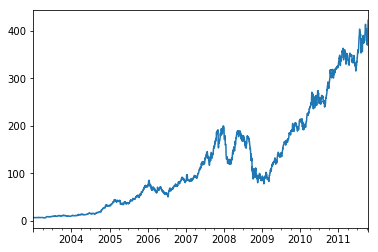

In [85]:
close_px['AAPL'].plot()

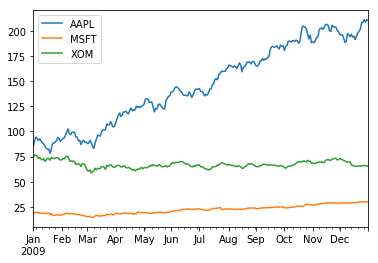

In [86]:
close_px.ix['2009'].plot()

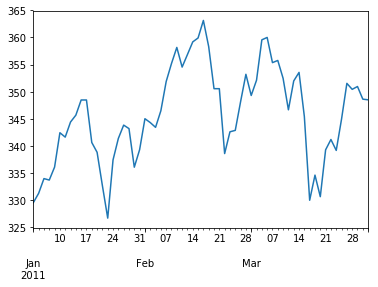

In [87]:
close_px['AAPL'].ix['01-2011':'03-2011'].plot()

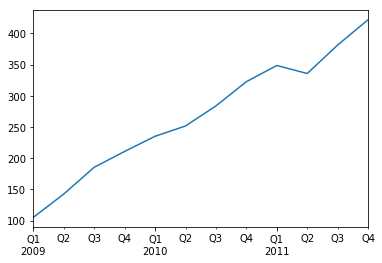

In [88]:
appl_q = close_px['AAPL'].resample('Q-DEC').ffill()
appl_q.ix['2009':].plot()

## Moving window functions

In [89]:
close_px = close_px.asfreq('B').fillna(method='ffill')

/Users/alexkirnas/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=250,center=False).mean()
  from ipykernel import kernelapp as app


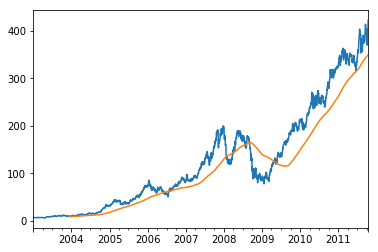

In [97]:
close_px.AAPL.plot()
pd.rolling_mean(close_px.AAPL, 250).plot()

In [92]:
from matplotlib import pyplot as plt
plt.figure()

In [96]:
appl_std250 = pd.rolling_std(close_px.AAPL, 250, min_periods=10)
appl_std250[5:12]

/Users/alexkirnas/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=250,min_periods=10,center=False).std()
  if __name__ == '__main__':


2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.074760
2003-01-17    0.112368
Freq: B, Name: AAPL, dtype: float64

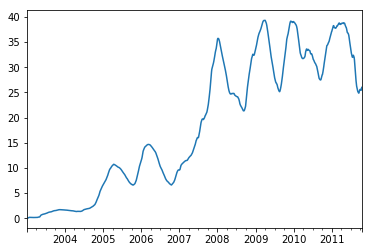

In [98]:
appl_std250.plot()

/Users/alexkirnas/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=60,center=False).mean()
  from ipykernel import kernelapp as app


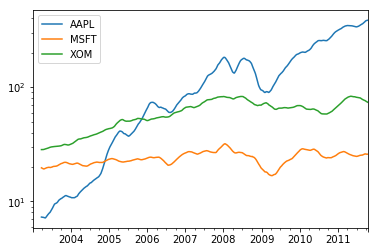

In [100]:
expanding_mean = lambda x: rolling_mean(x, len(x), min_periods=1)
pd.rolling_mean(close_px, 60).plot(logy=True)

In [101]:
plt.close('all')

### Exponentially-weighted functions

/Users/alexkirnas/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=60,min_periods=50,center=False).mean()
/Users/alexkirnas/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:7: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=60,min_periods=0,adjust=True,ignore_na=False).mean()


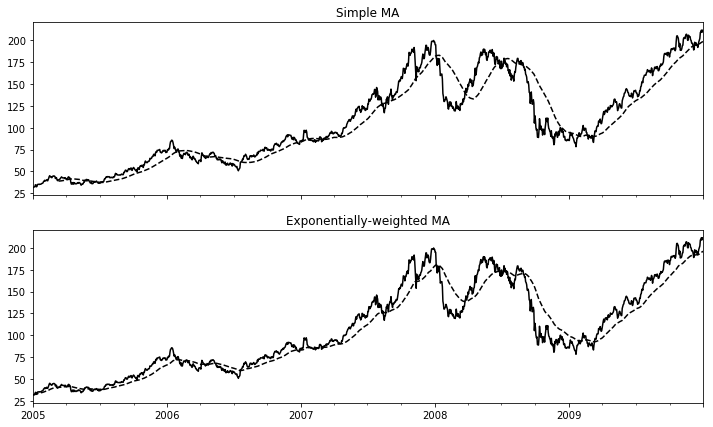

In [102]:
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=True,
                         figsize=(12, 7))

aapl_px = close_px.AAPL['2005':'2009']

ma60 = pd.rolling_mean(aapl_px, 60, min_periods=50)
ewma60 = pd.ewma(aapl_px, span=60)

aapl_px.plot(style='k-', ax=axes[0])
ma60.plot(style='k--', ax=axes[0])
aapl_px.plot(style='k-', ax=axes[1])
ewma60.plot(style='k--', ax=axes[1])
axes[0].set_title('Simple MA')
axes[1].set_title('Exponentially-weighted MA')

## Binary moving window functions

In [103]:
close_px
spx_px = close_px_all['SPX']

/Users/alexkirnas/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: FutureWarning: pd.rolling_corr is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=125,min_periods=100).corr(other=<Series>)
  app.launch_new_instance()


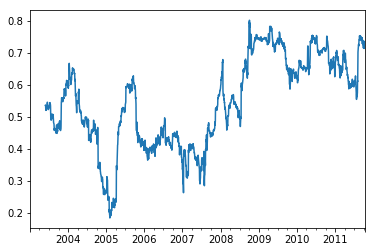

In [106]:
spx_rets = spx_px / spx_px.shift(1) - 1
returns = close_px.pct_change()
corr = pd.rolling_corr(returns.AAPL, spx_rets, 125, min_periods=100)
corr.plot()

/Users/alexkirnas/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: pd.rolling_corr is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=125,min_periods=100).corr(other=<Series>)
  if __name__ == '__main__':


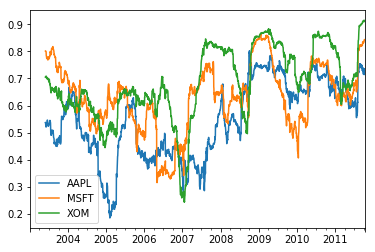

In [107]:
corr = pd.rolling_corr(returns, spx_rets, 125, min_periods=100)
corr.plot()

### User-defined moving window functions

/Users/alexkirnas/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: FutureWarning: pd.rolling_apply is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=250,center=False).apply(func=<function>,args=<tuple>,kwargs=<dict>)
  app.launch_new_instance()


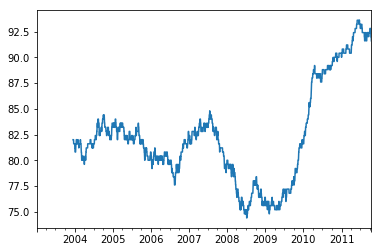

In [108]:
from scipy.stats import percentileofscore
score_at_2percent = lambda x: percentileofscore(x, 0.02)
result = pd.rolling_apply(returns.AAPL, 250, score_at_2percent)
result.plot()

# Performance and Memory Usage Notes

In [110]:
rng = pd.date_range('1/1/2000', periods=10000000, freq='10ms')
ts = Series(np.random.randn(len(rng)), index=rng)
ts

2000-01-01 00:00:00.000   -0.261426
2000-01-01 00:00:00.010    1.447974
2000-01-01 00:00:00.020    1.282878
2000-01-01 00:00:00.030   -0.743761
2000-01-01 00:00:00.040   -0.233302
2000-01-01 00:00:00.050   -0.073649
2000-01-01 00:00:00.060    0.416794
2000-01-01 00:00:00.070    3.401725
2000-01-01 00:00:00.080    1.999578
2000-01-01 00:00:00.090    1.831277
2000-01-01 00:00:00.100   -2.666666
2000-01-01 00:00:00.110   -0.117959
2000-01-01 00:00:00.120   -1.252543
2000-01-01 00:00:00.130    1.352375
2000-01-01 00:00:00.140   -0.279760
2000-01-01 00:00:00.150   -1.250280
2000-01-01 00:00:00.160    0.366356
2000-01-01 00:00:00.170    1.402564
2000-01-01 00:00:00.180   -0.183119
2000-01-01 00:00:00.190    0.767696
2000-01-01 00:00:00.200    0.763645
2000-01-01 00:00:00.210   -0.570289
2000-01-01 00:00:00.220   -1.304732
2000-01-01 00:00:00.230   -0.740207
2000-01-01 00:00:00.240    1.190865
2000-01-01 00:00:00.250   -0.467620
2000-01-01 00:00:00.260    1.351668
2000-01-01 00:00:00.270    0

In [111]:
ts.resample('15min', how='ohlc').info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 112 entries, 2000-01-01 00:00:00 to 2000-01-02 03:45:00
Freq: 15T
Data columns (total 4 columns):
open     112 non-null float64
high     112 non-null float64
low      112 non-null float64
close    112 non-null float64
dtypes: float64(4)
memory usage: 4.4 KB


/Users/alexkirnas/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).ohlc()
  if __name__ == '__main__':


In [113]:
%timeit ts.resample('15min').ohlc()

10 loops, best of 3: 105 ms per loop


In [114]:
rng = pd.date_range('1/1/2000', periods=10000000, freq='1s')
ts = Series(np.random.randn(len(rng)), index=rng)
%timeit ts.resample('15s').ohlc()

1 loop, best of 3: 134 ms per loop
